# 1.0 Data Import and Exploration

In [11]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
x = heart_disease.data.features 
y = heart_disease.data.targets  
# variable information
print(heart_disease.variables)
print(x)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

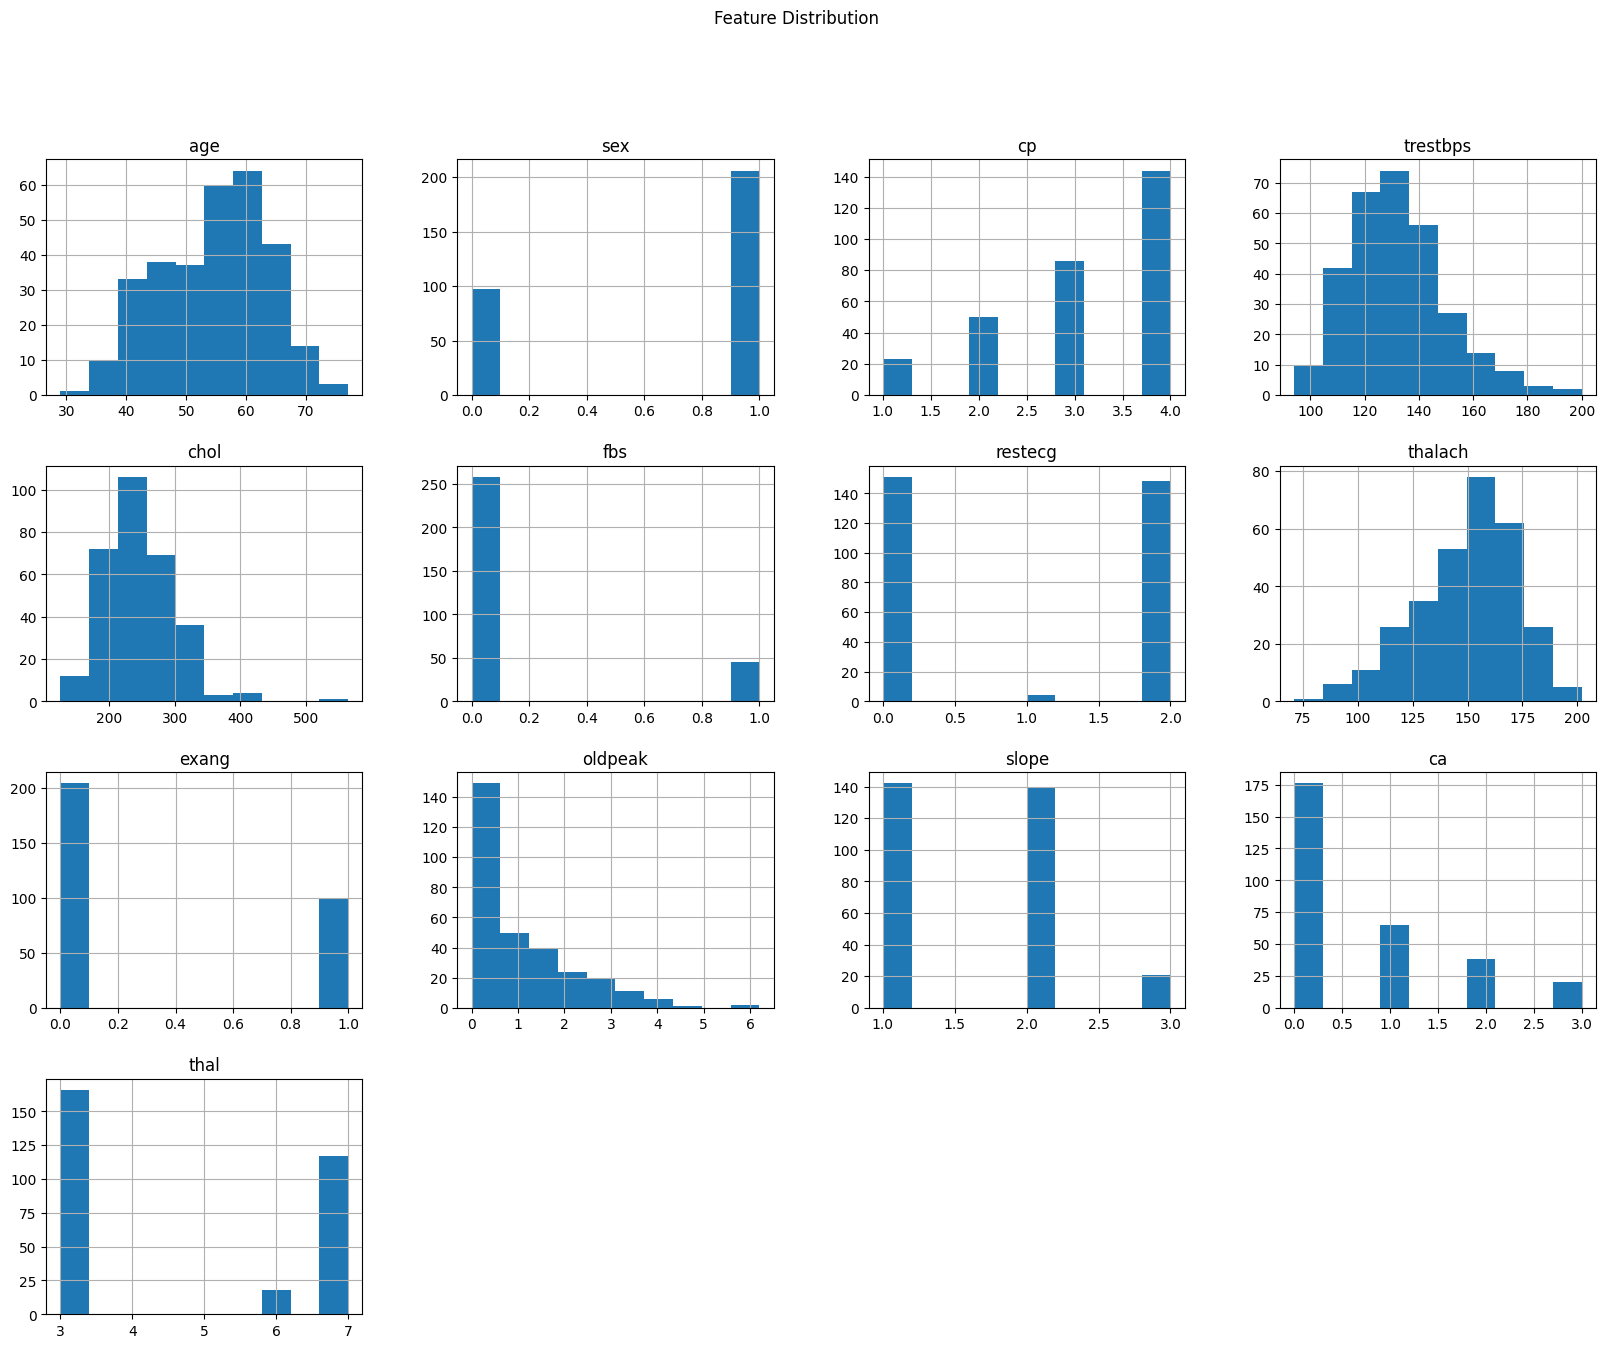

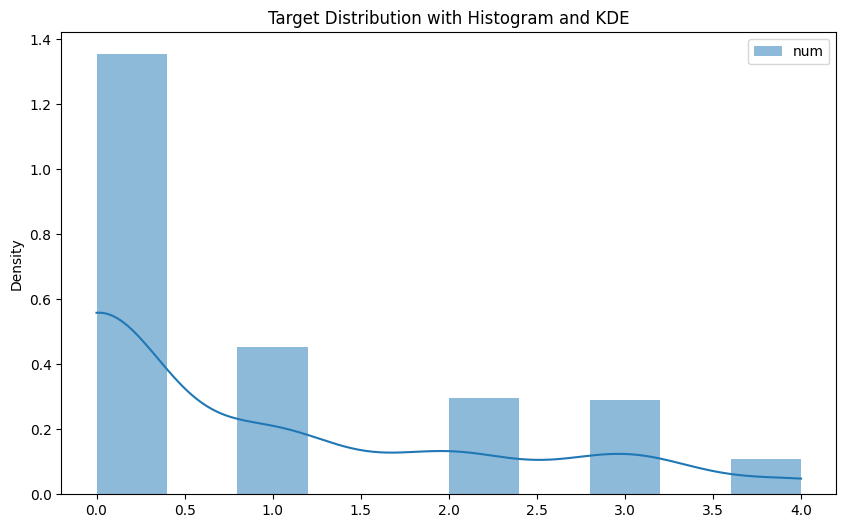

In [13]:
x.hist(figsize=(20, 15))
plt.suptitle('Feature Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, stat="density", linewidth=0)
plt.title('Target Distribution with Histogram and KDE')
plt.show()

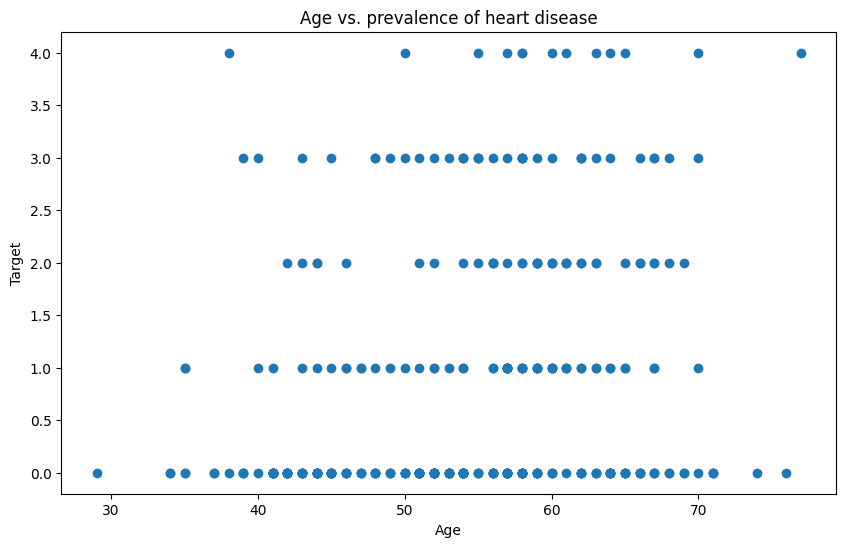

In [18]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(x['age'], y)
plt.title('Age vs. prevalence of heart disease')
plt.xlabel('Age')
plt.ylabel('Target')
plt.show()

# 2.0 Data preprocessing and encoding

## 2.1 Handling missing values

In [20]:
print(type(x))
missing_values_count = x.isnull().sum()
print(missing_values_count)

<class 'pandas.core.frame.DataFrame'>
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [21]:
#there are 6rows in total with null values (4 ca and 2 thal), replace null values with the median of the row
x = x.fillna(x.median())
missing_val = x.isnull().sum()
print(missing_val)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


## 2.2 Encoding categorical values

In [22]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
x_encoded = pd.get_dummies(x, columns=categorical_cols)
print(x_encoded)

     age  trestbps  chol  thalach  oldpeak  slope   ca  thal  sex_0  sex_1  \
0     63       145   233      150      2.3      3  0.0   6.0  False   True   
1     67       160   286      108      1.5      2  3.0   3.0  False   True   
2     67       120   229      129      2.6      2  2.0   7.0  False   True   
3     37       130   250      187      3.5      3  0.0   3.0  False   True   
4     41       130   204      172      1.4      1  0.0   3.0   True  False   
..   ...       ...   ...      ...      ...    ...  ...   ...    ...    ...   
298   45       110   264      132      1.2      2  0.0   7.0  False   True   
299   68       144   193      141      3.4      2  2.0   7.0  False   True   
300   57       130   131      115      1.2      2  1.0   7.0  False   True   
301   57       130   236      174      0.0      2  1.0   3.0   True  False   
302   38       138   175      173      0.0      1  0.0   3.0  False   True   

     ...   cp_2   cp_3   cp_4  fbs_0  fbs_1  restecg_0  restecg

## 2.3 Scale Features

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)
x_scaled_df = pd.DataFrame(x_scaled, columns=x_encoded.columns)
print(x_scaled_df)


          age  trestbps      chol   thalach   oldpeak     slope        ca  \
0    0.948726  0.757525 -0.264900  0.017197  1.087338  2.274579 -0.711131   
1    1.392002  1.611220  0.760415 -1.821905  0.397182  0.649113  2.504881   
2    1.392002 -0.665300 -0.342283 -0.902354  1.346147  0.649113  1.432877   
3   -1.932564 -0.096170  0.063974  1.637359  2.122573  2.274579 -0.711131   
4   -1.489288 -0.096170 -0.825922  0.980537  0.310912 -0.976352 -0.711131   
..        ...       ...       ...       ...       ...       ...       ...   
298 -1.046013 -1.234430  0.334813 -0.770990  0.138373  0.649113 -0.711131   
299  1.502821  0.700612 -1.038723 -0.376896  2.036303  0.649113  1.432877   
300  0.283813 -0.096170 -2.238149 -1.515388  0.138373  0.649113  0.360873   
301  0.283813 -0.096170 -0.206864  1.068113 -0.896862  0.649113  0.360873   
302 -1.821745  0.359134 -1.386944  1.024325 -0.896862 -0.976352 -0.711131   

         thal     sex_0     sex_1  ...      cp_2      cp_3      cp_4  \
0  